<a href="https://colab.research.google.com/github/avantika-singh7/Smart-QA-System/blob/main/user_qa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simple question and answering using roberta-base-squad2 model**

Installation requirements

In [35]:
!pip install torch

In [36]:
! pip install transformers


In [37]:
import torch
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

Question Answering

In [38]:
QA_input = {
'question': 'How many programming languages does BLOOM support?',
'context': 'BLOOM has 176 billion parameters and can generate text in 46 languages natural languages and 13 programming languages'}

In [39]:
model_name = "deepset/roberta-base-squad2"

In [40]:
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [41]:
inputs0 = tokenizer(QA_input['question'], QA_input['context'], return_tensors='pt')
output0 = model(**inputs0)

In [42]:
inputs1 = tokenizer(QA_input['question'], QA_input['context'], return_tensors='pt')  # Access elements using keys
output1 = model(**inputs1)

In [43]:
output0

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[ 2.0943, -9.1941, -8.9799, -9.4292, -9.9611, -9.6068, -9.2997, -9.7594,
         -9.9825, -9.4447, -9.9410, -4.9406, -9.8562, -5.2719, -8.0378, -8.6666,
         -8.0376, -3.1088, -7.6475, -7.5680, -8.4091, -6.4173, -6.6594, -6.8419,
         -6.0354,  0.0486, -5.7859, -4.4839, -6.9582, -5.3778,  6.8472, -4.7986,
         -4.9057, -4.9407]], grad_fn=<CloneBackward0>), end_logits=tensor([[ 2.5408, -8.1772, -7.7036, -7.9895, -7.0130, -7.9999, -8.2588, -7.7196,
         -6.8843, -7.5561, -7.0408,  0.1215, -7.2465, -8.4763, -8.2641, -6.2245,
         -8.7876, -3.9625, -6.6144, -6.4914, -7.9188, -8.8252, -8.7262, -7.4995,
         -6.8023,  0.0346, -2.7652, -6.4441, -3.6236, -6.4853,  7.2402, -1.3298,
          2.2163,  0.1214]], grad_fn=<CloneBackward0>), hidden_states=None, attentions=None)

In [44]:
answer_start_idx = torch.argmax(output0.start_logits)
answer_end_idx = torch.argmax(output0.end_logits)

answer_tokens = inputs0.input_ids[0][answer_start_idx : answer_end_idx + 1]
answer = tokenizer.decode(answer_tokens)

# Access the 'question' key directly since QA_input is a dictionary
print("ques: {}\nanswer:{}".format(QA_input['question'],answer))

ques: How many programming languages does BLOOM support?
answer: 13


# **Question answering with fine tuned BERT model**

In [45]:
import torch

In [46]:
from transformers import BertForQuestionAnswering

model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [ ]:
question = "How many parameters does BERT-large have?"
answer_text = "BERT-large is really big... it has 24-layers and an embedding size of 1,024, for a total of 340M parameters! Altogether it is 1.34GB, so expect it to take a couple minutes to download to your Colab instance."

In [ ]:
# Apply the tokenizer to the input text, treating them as a text-pair.
input_ids = tokenizer.encode(question, answer_text)

print('The input has a total of {:} tokens.'.format(len(input_ids)))

Print out the tokens with their IDs.

In [ ]:
# BERT only needs the token IDs, but for the purpose of inspecting the
# tokenizer's behavior, let's also get the token strings and display them.
tokens = tokenizer.convert_ids_to_tokens(input_ids)

# For each token and its id...
for token, id in zip(tokens, input_ids):

    # If this is the [SEP] token, add some space around it to make it stand out.
    if id == tokenizer.sep_token_id:
        print('')

    # Print the token string and its ID in two columns.
    print('{:<12} {:>6,}'.format(token, id))

    if id == tokenizer.sep_token_id:
        print('')

In [ ]:
# Search the input_ids for the first instance of the `[SEP]` token.
sep_index = input_ids.index(tokenizer.sep_token_id)

# The number of segment A tokens includes the [SEP] token istelf.
num_seg_a = sep_index + 1

# The remainder are segment B.
num_seg_b = len(input_ids) - num_seg_a

# Construct the list of 0s and 1s.
segment_ids = [0]*num_seg_a + [1]*num_seg_b

# There should be a segment_id for every input token.
assert len(segment_ids) == len(input_ids)

In [ ]:
# Run our example through the model.
outputs = model(torch.tensor([input_ids]), # The tokens representing our input text.
                             token_type_ids=torch.tensor([segment_ids]), # The segment IDs to differentiate question from answer_text
                             return_dict=True)

start_scores = outputs.start_logits
end_scores = outputs.end_logits


In [ ]:
# Find the tokens with the highest `start` and `end` scores.
answer_start = torch.argmax(start_scores)
answer_end = torch.argmax(end_scores)

# Combine the tokens in the answer and print it out.
answer = ' '.join(tokens[answer_start:answer_end+1])

print('Answer: "' + answer + '"')

In [ ]:
# Start with the first token.
answer = tokens[answer_start]

# Select the remaining answer tokens and join them with whitespace.
for i in range(answer_start + 1, answer_end + 1):

    # If it's a subword token, then recombine it with the previous token.
    if tokens[i][0:2] == '##':
        answer += tokens[i][2:]

    # Otherwise, add a space then the token.
    else:
        answer += ' ' + tokens[i]

print('Answer: "' + answer + '"')

# Visualising Scores

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

In [ ]:
# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
s_scores = start_scores.detach().numpy().flatten()
e_scores = end_scores.detach().numpy().flatten()

# We'll use the tokens as the x-axis labels. In order to do that, they all need
# to be unique, so we'll add the token index to the end of each one.
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))

 Bar plot showing the score for every input word being the "start" word.

/tmp/ipython-input-47-2520861439.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels, y=s_scores, ci=None)
/tmp/ipython-input-47-2520861439.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


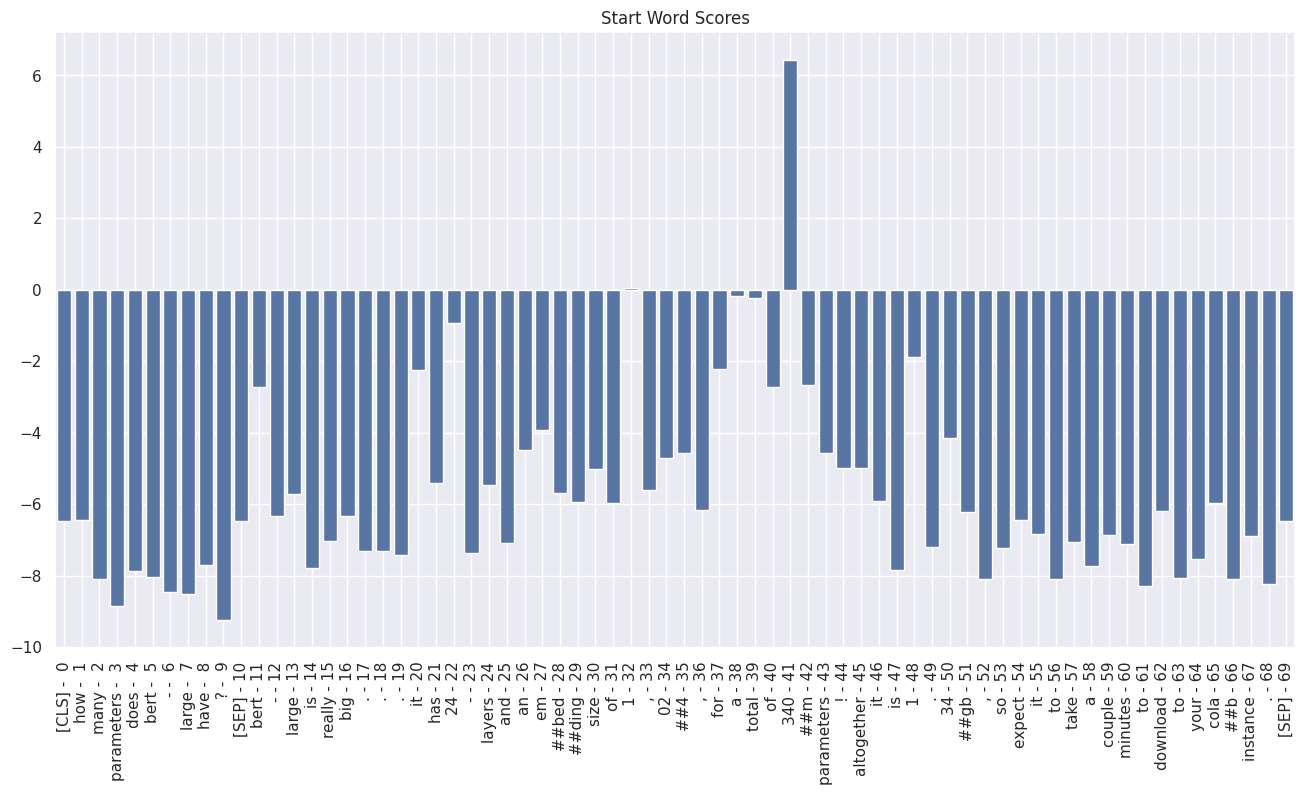

In [47]:
# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=s_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()

 Bar plot showing the score for every input word being the "end" word.

/tmp/ipython-input-48-645875075.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels, y=e_scores, ci=None)
/tmp/ipython-input-48-645875075.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


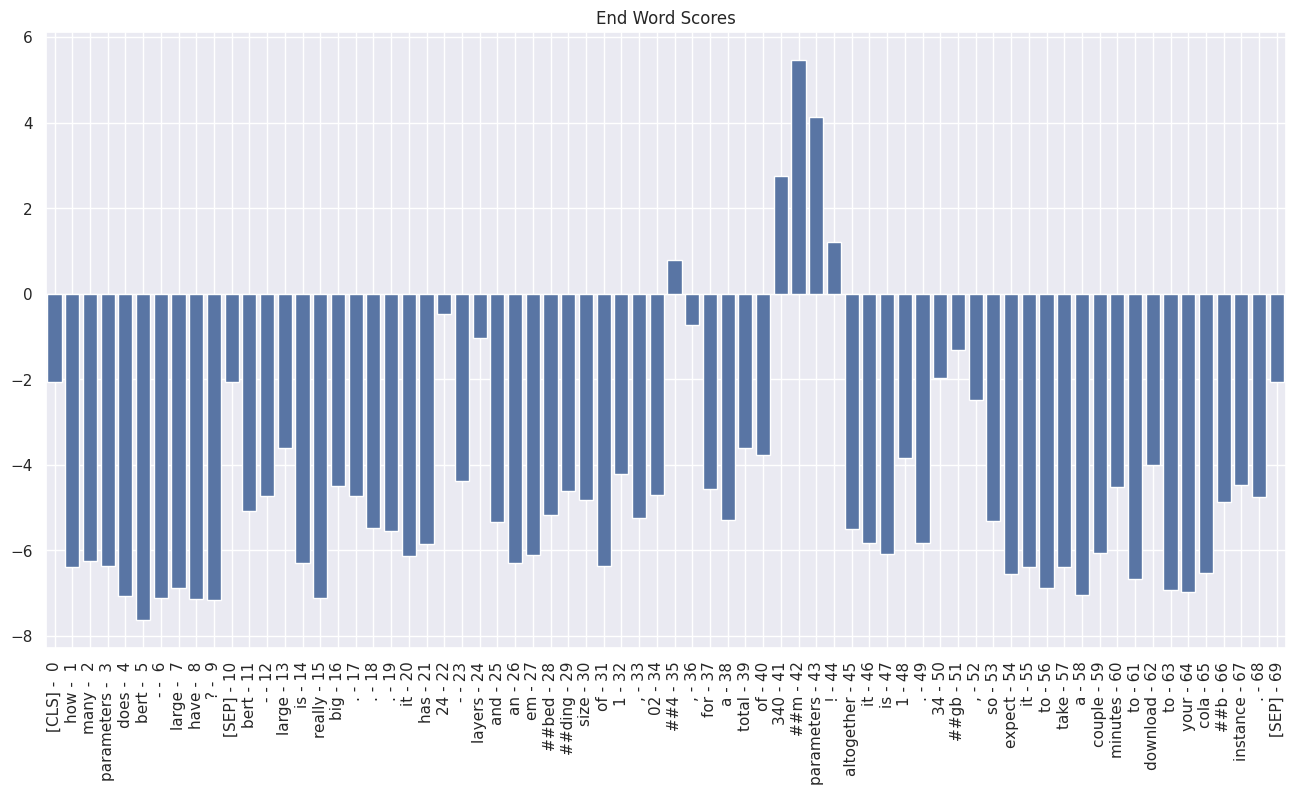

In [48]:
# Create a barplot showing the end word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=e_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()

# Converting Question Answering process into a function

In [49]:
def answer_question(question, answer_text):
    '''
    Takes a `question` string and an `answer_text` string (which contains the
    answer), and identifies the words within the `answer_text` that are the
    answer. Prints them out.
    '''
    # ======== Tokenize ========
    # Apply the tokenizer to the input text, treating them as a text-pair.
    input_ids = tokenizer.encode(question, answer_text)

    # Report how long the input sequence is.
    print('Query has {:,} tokens.\n'.format(len(input_ids)))

    # ======== Set Segment IDs ========
    # Search the input_ids for the first instance of the `[SEP]` token.
    sep_index = input_ids.index(tokenizer.sep_token_id)

    # The number of segment A tokens includes the [SEP] token istelf.
    num_seg_a = sep_index + 1

    # The remainder are segment B.
    num_seg_b = len(input_ids) - num_seg_a

    # Construct the list of 0s and 1s.
    segment_ids = [0]*num_seg_a + [1]*num_seg_b

    # There should be a segment_id for every input token.
    assert len(segment_ids) == len(input_ids)

    # ======== Evaluate ========
    # Run our example through the model.
    outputs = model(torch.tensor([input_ids]), # The tokens representing our input text.
                    token_type_ids=torch.tensor([segment_ids]), # The segment IDs to differentiate question from answer_text
                    return_dict=True)

    start_scores = outputs.start_logits
    end_scores = outputs.end_logits

    # ======== Reconstruct Answer ========
    # Find the tokens with the highest `start` and `end` scores.
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)

    # Get the string versions of the input tokens.
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    # Start with the first token.
    answer = tokens[answer_start]

    # Select the remaining answer tokens and join them with whitespace.
    for i in range(answer_start + 1, answer_end + 1):

        # If it's a subword token, then recombine it with the previous token.
        if tokens[i][0:2] == '##':
            answer += tokens[i][2:]

        # Otherwise, add a space then the token.
        else:
            answer += ' ' + tokens[i]

    print('Answer: "' + answer + '"')

In [50]:
import textwrap

# Wrap text to 80 characters.
wrapper = textwrap.TextWrapper(width=80)

bert_abstract = "We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models (Peters et al., 2018a; Radford et al., 2018), BERT is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial taskspecific architecture modifications. BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement)."

print(wrapper.fill(bert_abstract))

We introduce a new language representation model called BERT, which stands for
Bidirectional Encoder Representations from Transformers. Unlike recent language
representation models (Peters et al., 2018a; Radford et al., 2018), BERT is
designed to pretrain deep bidirectional representations from unlabeled text by
jointly conditioning on both left and right context in all layers. As a result,
the pre-trained BERT model can be finetuned with just one additional output
layer to create state-of-the-art models for a wide range of tasks, such as
question answering and language inference, without substantial taskspecific
architecture modifications. BERT is conceptually simple and empirically
powerful. It obtains new state-of-the-art results on eleven natural language
processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute
improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1
question answering Test F1 to 93.2 (1.5 point absolute improvement) 

In [32]:
!pip install datasets

In [ ]:
import torch
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, BertForQuestionAnswering, BertTokenizer
from datasets import load_dataset

# Load models and tokenizers
roberta_model = AutoModelForQuestionAnswering.from_pretrained("deepset/roberta-base-squad2")
roberta_tokenizer = AutoTokenizer.from_pretrained("deepset/roberta-base-squad2")

bert_model = BertForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
bert_tokenizer = BertTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")


In [ ]:
def get_answer(model, tokenizer, question, context):
    inputs = tokenizer(question, context, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    answer_start = torch.argmax(outputs.start_logits)
    answer_end = torch.argmax(outputs.end_logits) + 1
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs.input_ids[0][answer_start:answer_end]))
    return answer

# Example usage with one QA pair from the dataset
qa_example = dataset['validation'][0]
question = qa_example['question']
context = qa_example['context']

roberta_answer = get_answer(roberta_model, roberta_tokenizer, question, context)
bert_answer = get_answer(bert_model, bert_tokenizer, question, context)


In [ ]:
!pip install evaluate
import evaluate

# Initialize metrics
metric = evaluate.load('squad')

# ... (rest of your code)

In [ ]:
# Initialize metrics
metric = evaluate.load('squad')

# Evaluate both models on the validation set
for qa_example in dataset['validation']:
    question = qa_example['question']
    context = qa_example['context']
    true_answer = qa_example['answers']['text'][0]

    roberta_pred = get_answer(roberta_model, roberta_tokenizer, question, context)
    bert_pred = get_answer(bert_model, bert_tokenizer, question, context)

    # Format predictions and references as dictionaries
    metric.add(prediction={"prediction_text": roberta_pred, "id": qa_example["id"]},
               reference={"answers": {"answer_start": [0], "text": [true_answer]}, "id": qa_example["id"]})
    # Providing a dummy answer_start as it's not used for evaluation

roberta_results = metric.compute()

# Reinitialize metrics
metric = evaluate.load('squad')

for qa_example in dataset['validation']:
    question = qa_example['question']
    context = qa_example['context']
    true_answer = qa_example['answers']['text'][0]

    bert_pred = get_answer(bert_model, bert_tokenizer, question, context)

    # Format predictions and references as dictionaries
    metric.add(prediction={"prediction_text": bert_pred, "id": qa_example["id"]},
               reference={"answers": {"answer_start": [0], "text": [true_answer]}, "id": qa_example["id"]})

bert_results = metric.compute()

# Display results
print("Roberta Model Results: ", roberta_results)
print("BERT Model Results: ", bert_results)